In [ ]:
# Import necessary libraries
import pandas as pd
from textblob import TextBlob
import re
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords
import nltk
from gensim import corpora
from gensim.models import LdaModel
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

                                                text  \
0  @BillyM2k I find the gold toe sock – inevitabl...   
1                 Sock Con, the conference for socks   
2  Always something new for the magazine cover an...   
3                   @ExplainThisBob This guy gets it   
4  Sock tech is so advanced that you can get pret...   

                                        cleaned_text  polarity sentiment  
0   I find the gold toe sock – inevitably off kil... -0.093750  negative  
1                 Sock Con, the conference for socks  0.000000   neutral  
2  Always something new for the magazine cover an...  0.136364  positive  
3                                   This guy gets it  0.000000   neutral  
4  Sock tech is so advanced that you can get pret...  0.300000  positive  


In [ ]:
# Load the dataset
file_path = '/content/drive/MyDrive/Datathon Group 5/Data/elon_musk_tweets.csv'
elon_musk_tweets = pd.read_csv(file_path)

# Clean tweet text function
def clean_tweet(text):
    # Remove mentions (@username), URLs, hashtags, and special characters
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)  # Remove @mentions
    text = re.sub(r'#', '', text)  # Remove '#' symbol
    text = re.sub(r'RT[\s]+', '', text)  # Remove RT (retweets)
    text = re.sub(r'https?:\/\/\S+', '', text)  # Remove hyperlinks
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert text to lowercase
    return text

# Apply the cleaning function to the 'text' column
elon_musk_tweets['cleaned_text'] = elon_musk_tweets['text'].apply(clean_tweet)

# Perform sentiment analysis using TextBlob
elon_musk_tweets['polarity'] = elon_musk_tweets['cleaned_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Categorize the sentiment based on polarity
elon_musk_tweets['sentiment'] = elon_musk_tweets['polarity'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

# Display the results
print(elon_musk_tweets[['text', 'cleaned_text', 'polarity', 'sentiment']].head())

# Save the results to a new CSV file
elon_musk_tweets.to_csv('elon_musk_tweets_with_sentiment.csv', index=False)

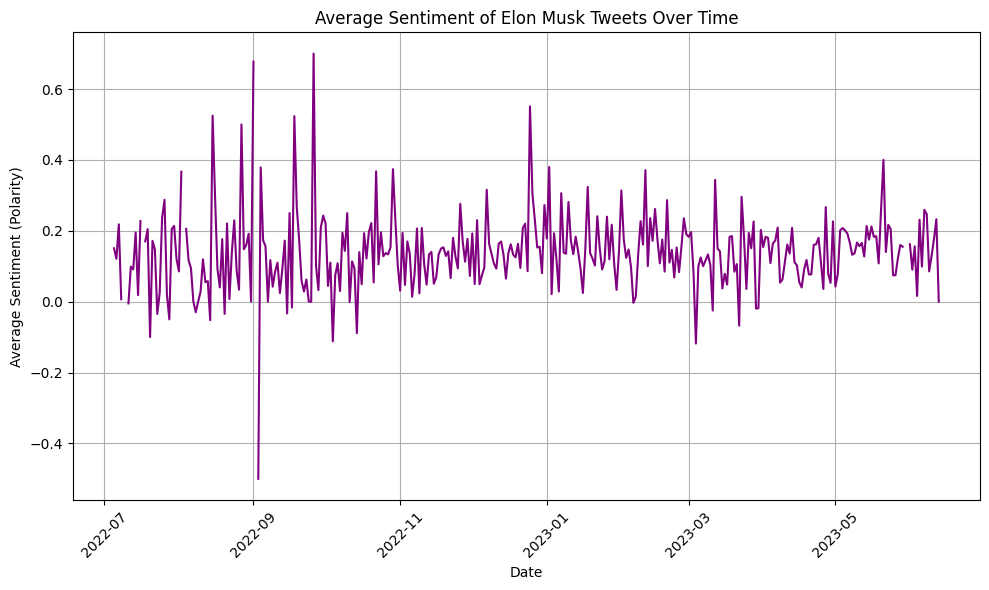

In [ ]:
# Load the cleaned tweet dataset
file_path = '/content/drive/MyDrive/Datathon Group 5/Data/elon_musk_tweets_with_sentiment.csv'
elon_musk_tweets = pd.read_csv(file_path)

# Set the 'date' column as the index
elon_musk_tweets.set_index('date', inplace=True)

# Calculate the average sentiment (polarity) over time (e.g., daily)
average_sentiment_over_time = elon_musk_tweets.resample('D')['polarity'].mean()

# Plot the average sentiment over time
plt.figure(figsize=(10, 6))
plt.plot(average_sentiment_over_time.index, average_sentiment_over_time, label='Average Sentiment', color='purple')

plt.title('Average Sentiment of Elon Musk Tweets Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment (Polarity)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

<ipython-input-6-9c3c28321077>:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_sentiment = elon_musk_tweets.resample('M')['polarity'].mean()


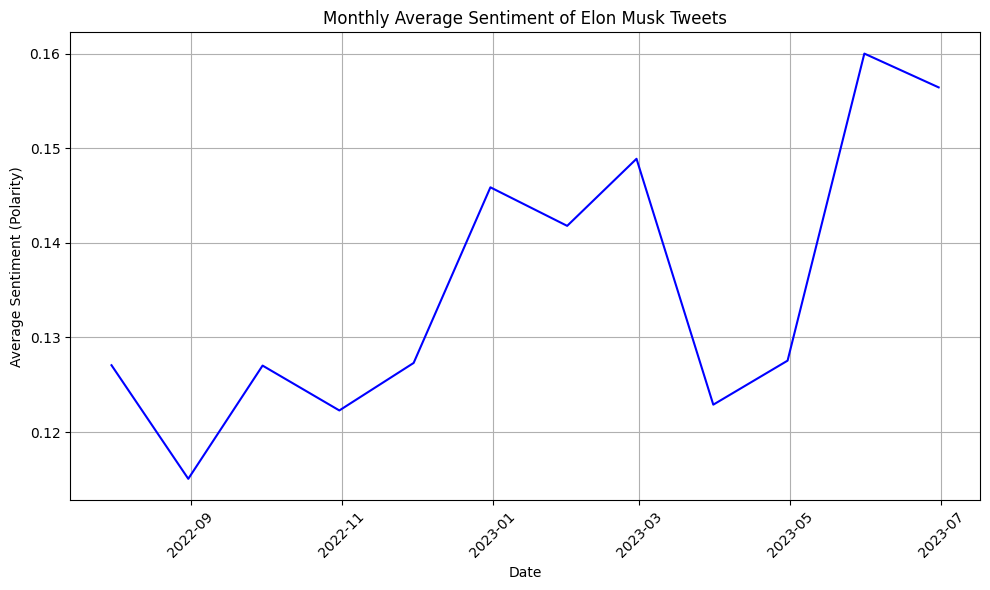

In [ ]:
# Set the 'date' column as the index
elon_musk_tweets.set_index('date', inplace=True)

# Calculate the average sentiment (polarity) per month
monthly_avg_sentiment = elon_musk_tweets.resample('M')['polarity'].mean()

# Plot the monthly average sentiment over time
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg_sentiment.index, monthly_avg_sentiment, label='Monthly Average Sentiment', color='blue')

plt.title('Monthly Average Sentiment of Elon Musk Tweets')
plt.xlabel('Date')
plt.ylabel('Average Sentiment (Polarity)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Most common words: [('twitter', 372), ('amp', 333), ('good', 195), ('true', 174), ('people', 165), ('great', 158), ('exactly', 145), ('like', 135), ('tesla', 130), ('yeah', 122), ('much', 116), ('many', 116), ('would', 112), ('time', 107), ('one', 104), ('interesting', 91), ('thats', 86), ('right', 81), ('even', 79), ('work', 79), ('im', 78), ('still', 77), ('real', 77), ('make', 75), ('actually', 74), ('dont', 74), ('maybe', 73), ('get', 72), ('lot', 72), ('coming', 72)]


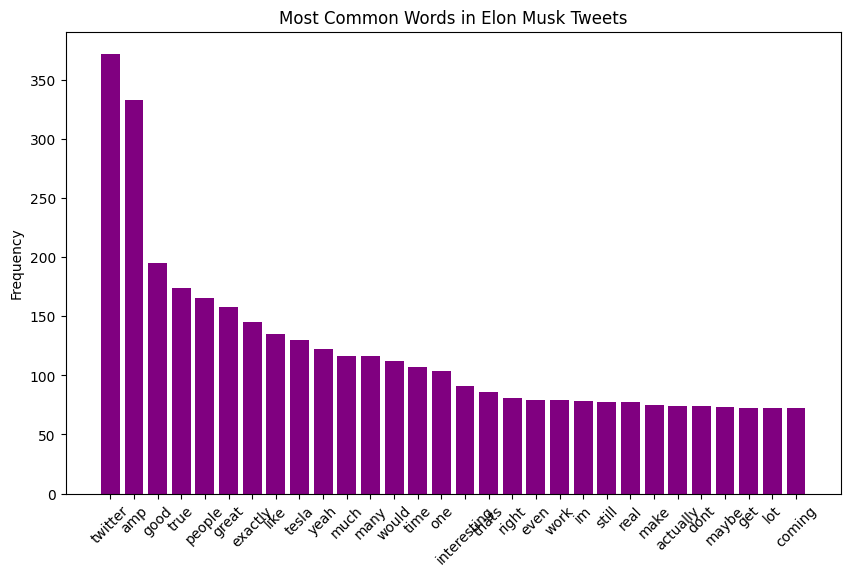

In [ ]:
# Download NLTK stopwords if not already downloaded
nltk.download('stopwords')

# Apply the cleaning function to the 'text' column
elon_musk_tweets['cleaned_text'] = elon_musk_tweets['text'].apply(clean_tweet)

# Tokenize the text and remove stopwords
stop_words = set(stopwords.words('english'))
elon_musk_tweets['tokens'] = elon_musk_tweets['cleaned_text'].apply(lambda x: [word for word in x.split() if word not in stop_words])

# Flatten the list of tokens to get a single list of all words
all_words = [word for tokens in elon_musk_tweets['tokens'] for word in tokens]

# Get the most common words using Counter
word_counts = Counter(all_words)
common_words = word_counts.most_common(30)  # Top 30 most common words

# Display the most common words and their counts
print("Most common words:", common_words)

# Plot the most common words as a bar chart
words, counts = zip(*common_words)
plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='purple')
plt.title('Most Common Words in Elon Musk Tweets')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

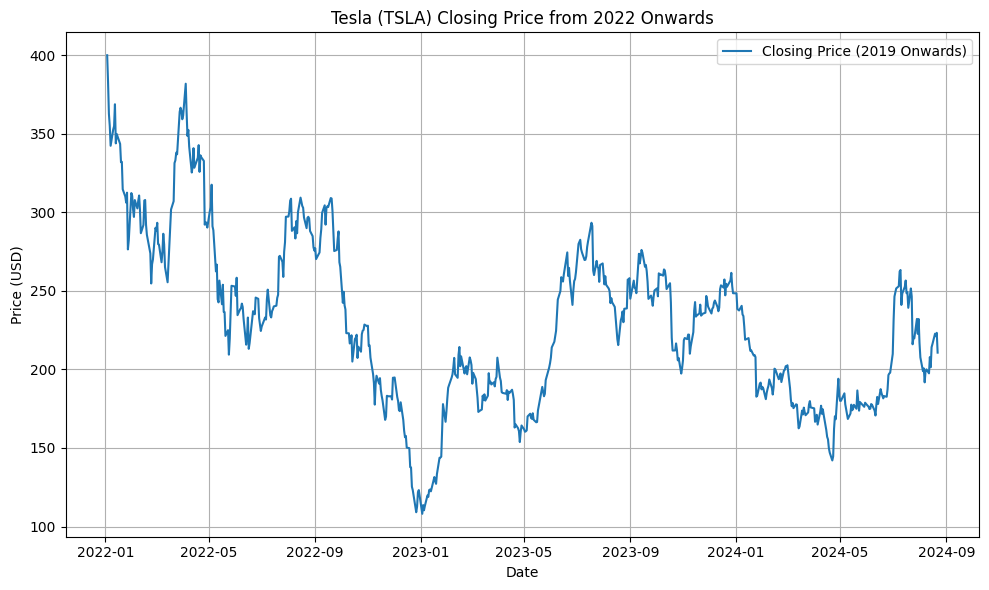

In [ ]:
# Load the tesla stock data
file_path = '/content/drive/MyDrive/Datathon Group 5/Data/TSLA-2.csv'
data = pd.read_csv(file_path)

# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Filter data from 2022 onwards
data_filtered = data[data['Date'] >= '2022-01-01']

# Plotting the 'Close' price over time (2022 onwards)
plt.figure(figsize=(10,6))
plt.plot(data_filtered['Date'], data_filtered['Close'], label='Closing Price (2022 Onwards)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Tesla (TSLA) Closing Price from 2022 Onwards')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Download NLTK stopwords if not already downloaded
nltk.download('stopwords')

# Load the dataset (replace 'elon_musk_tweets.csv' with your actual file path)
file_path = '/content/drive/MyDrive/Datathon Group 5/Data/elon_musk_tweets_with_sentiment.csv'
elon_musk_tweets = pd.read_csv(file_path)

# Apply the cleaning function to the 'text' column
elon_musk_tweets['cleaned_text'] = elon_musk_tweets['text'].apply(clean_tweet)

# Tokenize the text and remove stopwords
stop_words = set(stopwords.words('english'))
elon_musk_tweets['tokens'] = elon_musk_tweets['cleaned_text'].apply(lambda x: [word for word in x.split() if word not in stop_words])

# Create a dictionary and a document-term matrix for LDA
dictionary = corpora.Dictionary(elon_musk_tweets['tokens'])
doc_term_matrix = [dictionary.doc2bow(tokens) for tokens in elon_musk_tweets['tokens']]

# Train the LDA model (let's assume we want 5 topics)
lda_model = LdaModel(corpus=doc_term_matrix, num_topics=15, id2word=dictionary, passes=10)

# Display the topics found by LDA
topics = lda_model.print_topics(num_words=5)
for idx, topic in topics:
    print(f"Topic {idx + 1}: {topic}")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Topic 1: 0.101*"true" + 0.031*"lol" + 0.022*"concerning" + 0.022*"times" + 0.015*"extremely"
Topic 2: 0.021*"really" + 0.017*"love" + 0.016*"going" + 0.014*"big" + 0.014*"probably"
Topic 3: 0.019*"important" + 0.019*"super" + 0.018*"free" + 0.017*"never" + 0.016*"maybe"
Topic 4: 0.072*"great" + 0.030*"ai" + 0.030*"accurate" + 0.023*"thats" + 0.021*"real"
Topic 5: 0.072*"good" + 0.063*"yeah" + 0.021*"question" + 0.020*"twitter" + 0.016*"point"
Topic 6: 0.027*"starship" + 0.027*"launch" + 0.021*"nice" + 0.019*"amp" + 0.018*"day"
Topic 7: 0.067*"like" + 0.054*"time" + 0.016*"truth" + 0.015*"every" + 0.014*"many"
Topic 8: 0.084*"exactly" + 0.020*"correct" + 0.017*"youre" + 0.016*"oh" + 0.013*"best"
Topic 9: 0.032*"coming" + 0.028*"major" + 0.028*"absolutely" + 0.023*"soon" + 0.022*"way"
Topic 10: 0.024*"cool" + 0.024*"week" + 0.022*"amp" + 0.020*"next" + 0.019*"lot"
Topic 11: 0.025*"even" + 0.021*"years" + 0.021*"much" + 0.014*"hard" + 0.013*"enough"
Topic 12: 0.021*"thanks" + 0.017*"agree

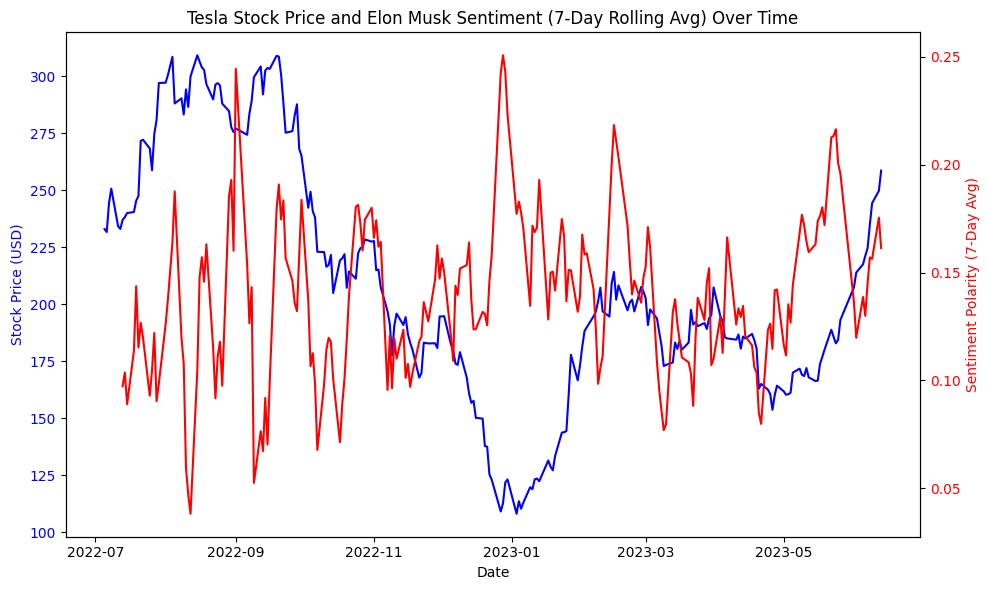

In [ ]:
# Load both datasets
stock_data = pd.read_csv('/content/drive/MyDrive/Datathon Group 5/Data/TSLA-2.csv')
sentiment_data = pd.read_csv('/content/elon_musk_tweets_with_sentiment.csv')

# Convert the 'Date' columns in both datasets to datetime format
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
sentiment_data['date'] = pd.to_datetime(sentiment_data['date'])

# Extract only the date part (if time is included)
sentiment_data['date'] = sentiment_data['date'].dt.date

# Filter stock data from 2022 onwards
stock_data_filtered = stock_data[stock_data['Date'] >= '2022-01-01']

# Group sentiment data by date to get average sentiment per day
sentiment_data_grouped = sentiment_data.groupby('date').agg({'polarity': 'mean'}).reset_index()

# Apply a 7-day rolling average to the sentiment polarity
sentiment_data_grouped['polarity_7d_avg'] = sentiment_data_grouped['polarity'].rolling(window=7).mean()

# Merge the stock data with sentiment data on the date
merged_data = pd.merge(stock_data_filtered, sentiment_data_grouped, left_on=stock_data_filtered['Date'].dt.date, right_on='date', how='inner')

# Plotting the 'Close' price and 7-day rolling sentiment polarity over time
fig, ax1 = plt.subplots(figsize=(10,6))

# Plotting stock closing price on the left y-axis
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Price (USD)', color='blue')
ax1.plot(merged_data['Date'], merged_data['Close'], color='blue', label='Closing Price')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for the sentiment polarity
ax2 = ax1.twinx()
ax2.set_ylabel('Sentiment Polarity (7-Day Avg)', color='red')
ax2.plot(merged_data['Date'], merged_data['polarity_7d_avg'], color='red', label='Sentiment Polarity (7-Day Avg)')
ax2.tick_params(axis='y', labelcolor='red')

# Add titles and legends
plt.title('Tesla Stock Price and Elon Musk Sentiment (7-Day Rolling Avg) Over Time')
fig.tight_layout()
plt.show()

In [ ]:
# Merge datasets
merged_data.to_csv('merged_tweets_and_stock_data.csv', index=False)

In [ ]:
# Assign merged data to variable
data = merged_data

# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Set the threshold date for splitting the data into training and testing sets
threshold_date = pd.Timestamp('2023-03-01')

# Split the data into training and testing sets
train_data = data[data['Date'] < threshold_date]
test_data = data[data['Date'] >= threshold_date]

# Define the features and target variable
features = ['Open', 'High', 'Low', 'Volume', 'polarity', 'polarity_7d_avg']
target = 'Close'

# Handle missing values in the polarity_7d_avg column by filling them with the mean of the column
train_data['polarity_7d_avg'].fillna(train_data['polarity_7d_avg'].mean(), inplace=True)
test_data['polarity_7d_avg'].fillna(test_data['polarity_7d_avg'].mean(), inplace=True)

# Separate features (X) and target (y) for training and testing
X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]

# Instantiate and train a RandomForestRegressor model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance using Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# [Optional] Save model for future use
# import joblib
# joblib.dump(model, 'random_forest_stock_price_model.pkl')

<ipython-input-28-87e5ec0f8028>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['polarity_7d_avg'].fillna(train_data['polarity_7d_avg'].mean(), inplace=True)
<ipython-input-28-87e5ec0f8028>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['polarity_7d_avg'].fillna(train_data['polarity_7d_avg'].mean(), inplace=True)
<ip

Mean Absolute Error: 2.7947336864788874


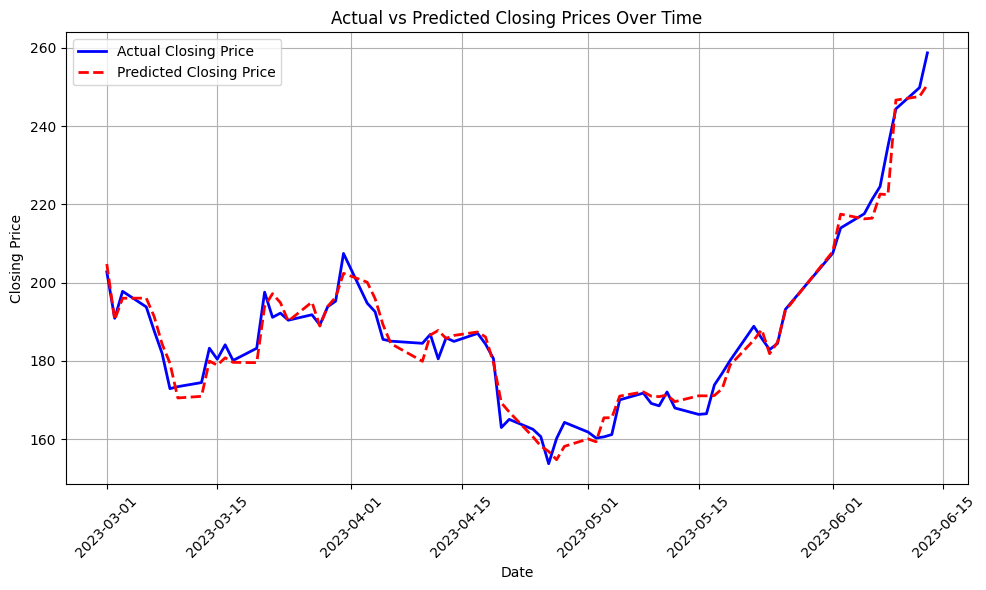

In [ ]:
# Create a DataFrame to store the actual and predicted values along with the corresponding dates
results_df = pd.DataFrame({
    'Date': test_data['Date'],  # Date from the test set
    'Actual': y_test,           # Actual closing prices
    'Predicted': y_pred         # Predicted closing prices
})

# Sort by Date to ensure proper time series order
results_df = results_df.sort_values(by='Date')

# Plot the actual and predicted closing prices
plt.figure(figsize=(10, 6))
plt.plot(results_df['Date'], results_df['Actual'], label='Actual Closing Price', color='blue', linewidth=2)
plt.plot(results_df['Date'], results_df['Predicted'], label='Predicted Closing Price', color='red', linestyle='--', linewidth=2)

# Add title and labels
plt.title('Actual vs Predicted Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.grid(True)

# Add a legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

Factors affecting Tesla's stock price:

**July 2022**

- Tesla increased production and deliveries --> increased sales --> higher revenues --> When Tesla reports strong deliveries, it indicates strong demand and growth potential, boosting investor confidence --> Increase stock price

- Despite global supply chain disruptions, Tesla showed resilience by increasing production, particularly through its U.S. and European factories. Investors saw Tesla's ability to navigate these challenges as a positive sign of its operational strength.

https://www.teslaoracle.com/2022/07/04/tesla-q2-2022-production-deliveries-down-model-s-x-up-june/

**Quarter 4, 2022**
- Tesla implemented significant price reductions on its vehicles in major markets such as China and the U.S. towards the end of 2022. These price cuts were designed to stimulate demand amidst growing competition, but they raised concerns about the company's profitability and long-term margins

- Musk's acquisition of Twitter: "But this year the unwinding has come equally fast. It has lost 69% its value amid Musk’s Twitter takeover and related distractions, investor jitters about growth assets and most recently, worries that high inflation and rising interest rates will dampen consumers’ enthusiasm for EVs." (October, 2022)

https://time.com/6243613/why-tesla-stock-down/

**2023**
-





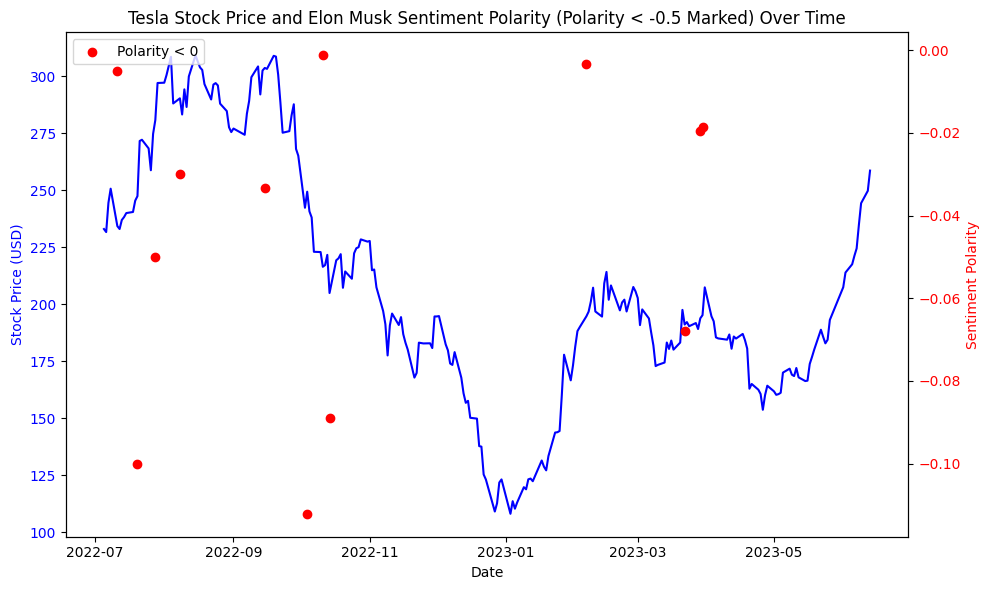

In [ ]:
# Load both datasets
stock_data = pd.read_csv('/content/drive/MyDrive/Datathon Group 5/Data/TSLA-2.csv')  # Replace with your file path
sentiment_data = pd.read_csv('/content/elon_musk_tweets_with_sentiment.csv')  # Replace with your file path

# Convert the 'Date' columns in both datasets to datetime format
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
sentiment_data['date'] = pd.to_datetime(sentiment_data['date'])

# Extract only the date part (if time is included)
sentiment_data['date'] = sentiment_data['date'].dt.date

# Filter stock data from 2022 onwards
stock_data_filtered = stock_data[stock_data['Date'] >= '2022-01-01']

# Group sentiment data by date to get average sentiment per day
sentiment_data_grouped = sentiment_data.groupby('date').agg({'polarity': 'mean'}).reset_index()

# Mark instances where the polarity is less than 0
sentiment_data_grouped['negative_polarity'] = sentiment_data_grouped['polarity'] < 0

# Merge the stock data with sentiment data on the date
merged_data = pd.merge(stock_data_filtered, sentiment_data_grouped, left_on=stock_data_filtered['Date'].dt.date, right_on='date', how='inner')

# Plotting the 'Close' price and sentiment polarity less than 0 over time
fig, ax1 = plt.subplots(figsize=(10,6))

# Plotting stock closing price on the left y-axis
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Price (USD)', color='blue')
ax1.plot(merged_data['Date'], merged_data['Close'], color='blue', label='Closing Price')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for the sentiment polarity
ax2 = ax1.twinx()
ax2.set_ylabel('Sentiment Polarity', color='red')
ax2.scatter(
    merged_data['Date'][merged_data['negative_polarity']],
    merged_data['polarity'][merged_data['negative_polarity']],
    color='red', label='Polarity < 0', marker='o'
)
ax2.tick_params(axis='y', labelcolor='red')

# Add titles and legends
plt.title('Tesla Stock Price and Elon Musk Sentiment Polarity (Polarity < -0.5 Marked) Over Time')
fig.tight_layout()
plt.legend(loc='upper left')
plt.show()